-------------------------------------------------------------

**If any part of this notebook is used in your research, please cite with the reference found in [README.md](https://github.com/jGaboardi/tigernet#citations)**.

-------------------------------------------------------------

# Example usage: synthetic lattice network


### Author: James D. Gaboardi jgaboardi@gmail.com


-------------------------------------------------------------

In [1]:
%load_ext watermark
%watermark

Last updated: 2021-02-14T15:38:55.275512-05:00

Python implementation: CPython
Python version       : 3.9.0
IPython version      : 7.20.0

Compiler    : Clang 11.0.0 
OS          : Darwin
Release     : 20.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [2]:
import tigernet
%load_ext autoreload
%autoreload 2
%matplotlib inline
%watermark -w
%watermark -iv

Watermark: 2.1.0

tigernet: 0.2.3
json    : 2.0.9



In [3]:
try:
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats("retina")
except ImportError:
    pass

-------------------------------------------------------------

In [4]:
print(dir(tigernet))

['Network', 'Observations', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'generate_data', 'generate_lattice', 'generate_obs', 'generate_sine_lines', 'get_discard_mtfcc_by_desc', 'get_discard_segms', 'get_mtfcc_types', 'info', 'obs2obs_cost_matrix', 'stats', 'testing_data', 'tigernet', 'utils']


## Generate a synthetic lattice

,geometry,SegID,MTFCC
0,"LINESTRING (4.50000 0.00000, 4.50000 4.50000)",1,S1400
1,"LINESTRING (4.50000 4.50000, 4.50000 9.00000)",2,S1400
2,"LINESTRING (0.00000 4.50000, 4.50000 4.50000)",3,S1400
3,"LINESTRING (4.50000 4.50000, 9.00000 4.50000)",4,S1400


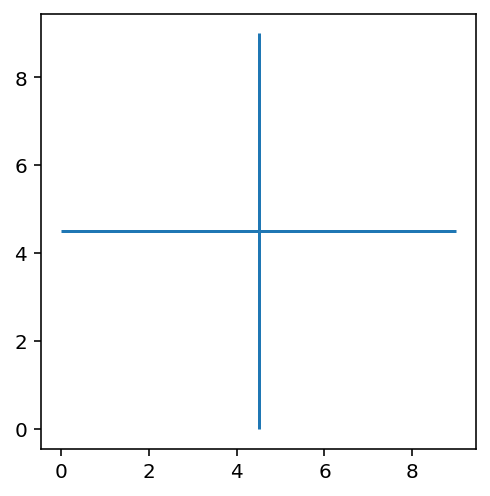

In [5]:
lattice = tigernet.generate_lattice(n_hori_lines=1, n_vert_lines=1)
lattice.plot();
lattice

In [6]:
print(help(tigernet.Network))

Help on class Network in module tigernet.tigernet:

class Network(builtins.object)
 |  Network(s_data, from_raw=False, sid_name='SegID', nid_name='NodeID', geo_col='geometry', len_col='length', xyid='xyid', tnid='TNID', tnidf='TNIDF', tnidt='TNIDT', attr1=None, attr2=None, mtfcc_types=None, mtfcc_discard=None, discard_segs=None, mtfcc_split=None, mtfcc_intrst=None, mtfcc_ramp=None, mtfcc_serv=None, mtfcc_split_by=None, mtfcc_split_grp=None, skip_restr=False, calc_len=False, record_components=False, record_geom=False, largest_component=False, calc_stats=False, def_graph_elems=False)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, s_data, from_raw=False, sid_name='SegID', nid_name='NodeID', geo_col='geometry', len_col='length', xyid='xyid', tnid='TNID', tnidf='TNIDF', tnidt='TNIDT', attr1=None, attr2=None, mtfcc_types=None, mtfcc_discard=None, discard_segs=None, mtfcc_split=None, mtfcc_intrst=None, mtfcc_ramp=None, mtfcc_serv=None, mtfcc_split_by=None, mtfcc_split_grp=None, skip_r

-------------------------------------------------------------

## Create a network instance & examine its attributes

In [7]:
network = tigernet.Network(
    s_data=lattice,
    record_components=True,
    record_geom=True,
    largest_component=False,
    def_graph_elems=True
)
print(dir(network))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'attr1', 'attr2', 'build_associations', 'build_base', 'build_components', 'build_network', 'build_topology', 'calc_entropy', 'calc_net_stats', 'cc_lens', 'cost_matrix', 'define_graph_elements', 'discard_segs', 'from_raw', 'geo_col', 'len_col', 'mtfcc_discard', 'mtfcc_types', 'n_ccs', 'n_data', 'n_ids', 'n_node', 'n_segm', 'network_length', 'nid_name', 'node2coords', 'node2degree', 'node2elem', 'node2geom', 'node2node', 'node2segm', 'node2xyid', 'node_cc', 'nodes_kdtree', 's_data', 's_ids', 'segm2coords', 'segm2elem', 'segm2geom', 'segm2len', 'segm2node', 'segm2segm', 'segm2xyid', 'segm_cc', 'sid_name', 'simplify_network', 'tlid', 'tnid', 'tnidf', 

In [8]:
network.s_data

,geometry,SegID,MTFCC,length,xyid,s_neigh,n_neigh,CC,ccLength,graph_elem
0,"LINESTRING (4.50000 0.00000, 4.50000 4.50000)",0,S1400,4.5,"['x4.5y0.0', 'x4.5y4.5']","[1, 2, 3]","[0, 1]",1,18.0,leaf
1,"LINESTRING (4.50000 4.50000, 4.50000 9.00000)",1,S1400,4.5,"['x4.5y4.5', 'x4.5y9.0']","[0, 2, 3]","[1, 2]",1,18.0,leaf
2,"LINESTRING (0.00000 4.50000, 4.50000 4.50000)",2,S1400,4.5,"['x0.0y4.5', 'x4.5y4.5']","[0, 1, 3]","[1, 3]",1,18.0,leaf
3,"LINESTRING (4.50000 4.50000, 9.00000 4.50000)",3,S1400,4.5,"['x4.5y4.5', 'x9.0y4.5']","[0, 1, 2]","[1, 4]",1,18.0,leaf


In [9]:
network.n_data

,geometry,NodeID,xyid,s_neigh,n_neigh,CC,degree,graph_elem
0,POINT (4.50000 0.00000),0,['x4.5y0.0'],[0],[1],1,1,leaf
1,POINT (4.50000 4.50000),1,['x4.5y4.5'],"[0, 1, 2, 3]","[0, 2, 3, 4]",1,4,branch
2,POINT (4.50000 9.00000),2,['x4.5y9.0'],[1],[1],1,1,leaf
3,POINT (0.00000 4.50000),3,['x0.0y4.5'],[2],[1],1,1,leaf
4,POINT (9.00000 4.50000),4,['x9.0y4.5'],[3],[1],1,1,leaf


In [10]:
skws = {"color": "k", "alpha": .5, "zorder": 0}
nkws = {"color": "r", "markersize": 90, "alpha": .5, "ec":"k", "zorder": 1}

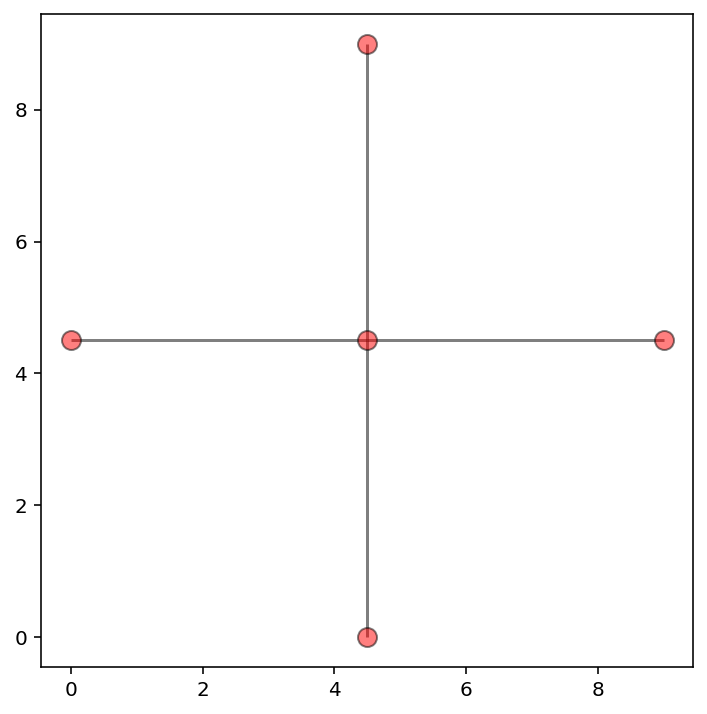

In [11]:
ax = network.s_data.plot(figsize=(6,6), **skws)
network.n_data.plot(ax=ax, **nkws);

### Network element IDs

In [12]:
network.s_ids, network.n_ids

([0, 1, 2, 3], [0, 1, 2, 3, 4])

### Network segment count and length

In [13]:
network.n_segm, network.network_length

(4, 18.0)

### Network node count and degrees

In [14]:
network.n_node, network.node2degree

(5, {0: 1, 1: 4, 2: 1, 3: 1, 4: 1})

### Network connected components

In [15]:
network.n_ccs, network.segm_cc, network.node_cc

(1, {1: [0, 1, 2, 3]}, {1: [0, 1, 2, 3, 4]})

### Network element topology
#### x->x

In [16]:
network.segm2segm, network.node2node

({0: [1, 2, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]},
 {0: [1], 1: [0, 2, 3, 4], 2: [1], 3: [1], 4: [1]})

#### x->y

In [17]:
network.segm2node, network.node2segm

({0: [0, 1], 1: [1, 2], 2: [1, 3], 3: [1, 4]},
 {0: [0], 1: [0, 1, 2, 3], 2: [1], 3: [2], 4: [3]})

### Network element type

In [18]:
network.segm2elem, network.node2elem

({0: 'leaf', 1: 'leaf', 2: 'leaf', 3: 'leaf'},
 {0: 'leaf', 1: 'branch', 2: 'leaf', 3: 'leaf', 4: 'leaf'})

-------------------------------------------------------------

## Simply the network (no effect in this case)

In [19]:
network.simplify_network(inplace=True)

-------------------------------------------------------------

## Generate a network cost matrix with shortest path trees

In [20]:
network.cost_matrix(asattr=True, wpaths=True)
network.n2n_matrix

array([[0. , 4.5, 9. , 9. , 9. ],
       [4.5, 0. , 4.5, 4.5, 4.5],
       [9. , 4.5, 0. , 9. , 9. ],
       [9. , 4.5, 9. , 0. , 9. ],
       [9. , 4.5, 9. , 9. , 0. ]])

In [21]:
network.n2n_paths

{0: {0: [0], 1: [0], 2: [1, 0], 3: [1, 0], 4: [1, 0]},
 1: {0: [1], 1: [1], 2: [1], 3: [1], 4: [1]},
 2: {0: [1, 2], 1: [2], 2: [2], 3: [1, 2], 4: [1, 2]},
 3: {0: [1, 3], 1: [3], 2: [1, 3], 3: [3], 4: [1, 3]},
 4: {0: [1, 4], 1: [4], 2: [1, 4], 3: [1, 4], 4: [4]}}

-------------------------------------------------------------
## Generate synthetic observations

In [22]:
observations = tigernet.generate_obs(5, network.s_data, seed=404)
observations["obs_id"] = ["a", "b", "c", "d", "e"]
observations

,geometry,obs_id
0,POINT (6.01943 3.15640),a
1,POINT (8.03795 2.50232),b
2,POINT (0.47238 8.26102),c
3,POINT (4.24946 0.05623),d
4,POINT (4.39206 7.57014),e


In [23]:
okws = {"color": "b", "markersize": 60, "alpha": .75, "ec":"k", "zorder": 2}

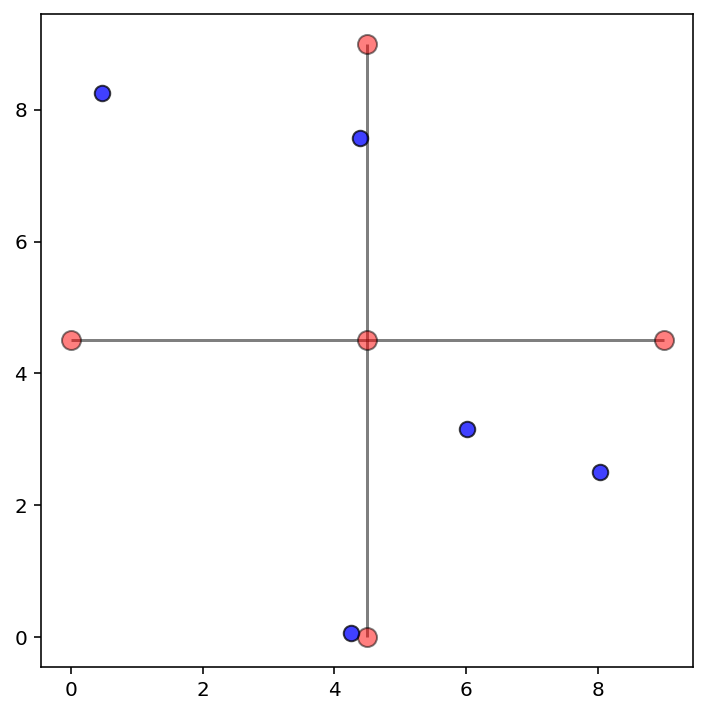

In [24]:
ax = network.s_data.plot(figsize=(6,6), **skws)
network.n_data.plot(ax=ax, **nkws)
observations.plot(ax=ax, **okws);

-------------------------------------------------------------
## Associate the observations with the network

In [25]:
network_observations = tigernet.Observations(
    network,
    observations.copy(),
    df_name="obs1",
    df_key="obs_id",
)
print(dir(network_observations))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'df', 'df_key', 'df_name', 'geo_col', 'k', 'kd_tree', 'obs2coords', 'obs2segm', 'sid_name', 'snap_to', 'snapped_points', 'tol', 'xyid']


In [26]:
network_observations.snapped_points

,obs_id,geometry,assoc_segm,dist_a,node_a,dist_b,node_b,dist2line,xyid
0,a,POINT (6.01943 4.50000),3,1.519426,1,2.980574,4,1.343598,['x6.019425770680618y4.5']
1,b,POINT (8.03795 4.50000),3,3.537952,1,0.962048,4,1.997682,['x8.03795164668808y4.5']
2,c,POINT (0.47238 4.50000),2,0.472383,3,4.027617,1,3.761022,['x0.472383396581738y4.5']
3,d,POINT (4.50000 0.05623),0,0.056225,0,4.443775,1,0.250542,['x4.5y0.05622526079105139']
4,e,POINT (4.50000 7.57014),1,3.070140,1,1.429860,2,0.107943,['x4.5y7.5701402617992954']


In [27]:
network_observations.obs2segm

{'a': 3, 'b': 3, 'c': 2, 'd': 0, 'e': 1}

In [28]:
bkws = {"color": "y", "markersize": 30, "alpha": .85, "ec":"k", "zorder": 3}

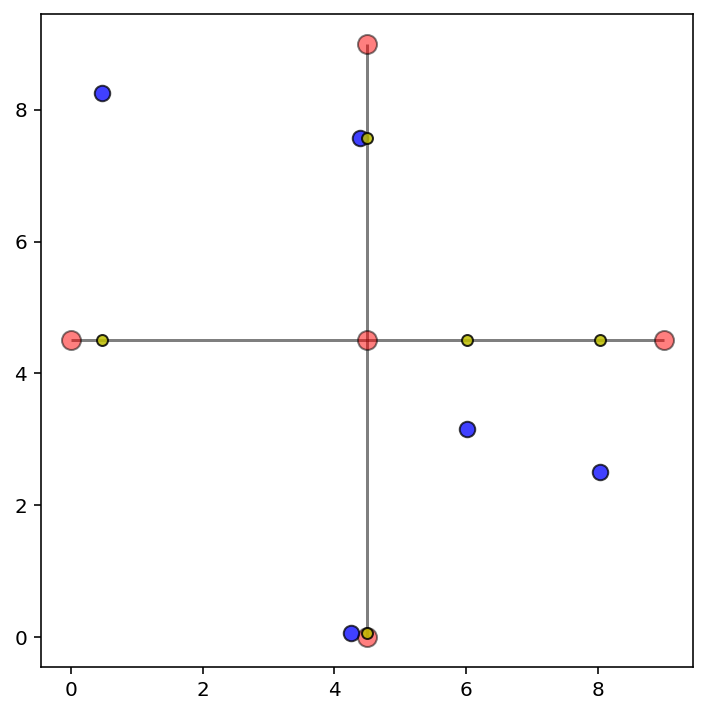

In [29]:
ax = network.s_data.plot(figsize=(6,6), **skws)
network.n_data.plot(ax=ax, **nkws)
network_observations.df.plot(ax=ax, **okws)
network_observations.snapped_points.plot(ax=ax, **bkws);

-------------------------------------------------------------
## Generate a cost matrix between all observations

In [30]:
print(help(tigernet.obs2obs_cost_matrix))

Help on function obs2obs_cost_matrix in module tigernet.tigernet:

obs2obs_cost_matrix(origin_observations, network, destination_observations=None, snap_dist=True, distance_type='network')
    Calculate a cost matrix from (n) observations to (m) observations.
    
    Parameters
    ----------
    origin_observations : tigernet.Observations
    network : tigernet.Network
    destination_observations : tigernet.Observations
        Destination observations. Default is ``None``.
    snap_dist : str
        Include the distance to observations from the network. Default is ``True``.
    distance_type : str
        Type of distance cost matrix. Default is ``'network'``.
        Option is ``'euclidean'``.
    
    Returns
    -------
    n2m_matrix : numpy.ndarray
        'nXm' cost matrix.

None


In [31]:
tigernet.obs2obs_cost_matrix(network_observations, network)

array([[ 0.        ,  5.35980629, 10.65166293,  7.55734019,  6.04110705],
       [ 5.35980629,  0.        , 13.3242729 , 10.22995016,  8.71371701],
       [10.65166293, 13.3242729 ,  0.        , 12.48295526, 10.96672212],
       [ 7.55734019, 10.22995016, 12.48295526,  0.        ,  7.87239938],
       [ 6.04110705,  8.71371701, 10.96672212,  7.87239938,  0.        ]])

------------------